# Statistics (Part 2): 

In [1]:
import numpy as np 
import scipy.io as sio
import scipy.stats as sts
import matplotlib.pyplot as plt 

# Demo 1: Graphical distribution tests 

In [79]:
# load data - wt percent organic matter in lake cores
corg1 = np.loadtxt('organicmatter_one.txt')

In [80]:
# practical guideline: bins = sqrt(N)
nbin = np.round(np.sqrt( corg1.shape[0] )).astype(np.int)

Text(0, 0.5, 'Frequency')

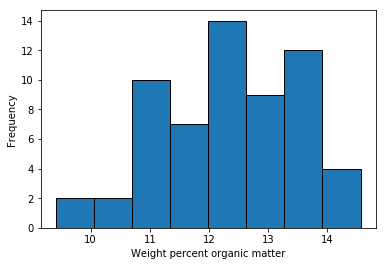

In [81]:
fig, ax = plt.subplots()
_ = ax.hist(corg1,nbin,edgecolor='k')
ax.set_xlabel('Weight percent organic matter')
ax.set_ylabel('Frequency')

In [82]:
corg1_freq, corg1_bins = np.histogram(corg1)

# We typically want bin ceneters, which can be found by adding a half 
# bin-width for the first N edges of TC_bins

# Calculate half-width
half_width = (corg1_bins[1] - corg1_bins[0]) / 2
# Add half-width to first N bins
corg1_bins = corg1_bins[:-1] + half_width

In [83]:
#compute mean and std  
corg1_mean = np.mean(corg1)  
corg1_std  = np.std(corg1)

The general formula for the probability density function of the normal distribution is   
\begin{align} 
f(x) = \frac{e^{-(x - \mu)^{2}/(2\sigma^{2}) }} {\sigma\sqrt{2\pi}}
\end{align}

In [84]:
def normal_PDF(x, mu, sigma):
    fx = np.exp( -1*(x-mu)**2 / (2*sigma**2)) / (sigma * np.sqrt(2*np.pi))
    return fx

f1 = normal_PDF(corg1_bins,corg1_mean,corg1_std)

In [85]:
# Calculate normal distribution using scipy function and demonstrate the
# result is the same as manual function
f2 = sts.norm.pdf(corg1_bins,corg1_mean,corg1_std)

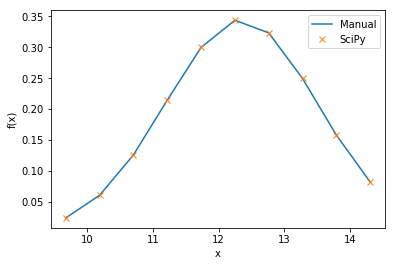

In [86]:
fig, ax = plt.subplots()
ax.plot(corg1_bins,f1, label='Manual')
ax.plot(corg1_bins,f2,'x', label='SciPy')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')

ax.legend()

In [87]:
# Scale distribution to data:
corg1_total = np.sum(corg1_freq)
f2_total    = np.sum(f2)

f3          = f2*(corg1_total/f2_total)

Text(0, 0.5, 'Frequency')

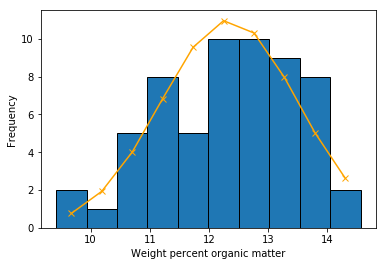

In [88]:
fig, ax = plt.subplots()
ax.bar(corg1_bins, corg1_freq, width = half_width*2, edgecolor='k')
ax.plot(corg1_bins, f3, '-x', color='orange')

ax.set_xlabel('Weight percent organic matter')
ax.set_ylabel('Frequency')

# Demo 2: t-test

In [12]:
# load data - wt percent organic matter in lake cores
data  = sio.loadmat('organicmatter_two.mat')
corg1 = data['corg1'].astype(np.float32)
corg2 = data['corg2'].astype(np.float32)

# calculate mean of first data set
print(np.mean(corg1))
# calculate mean of second data set
print(np.mean(corg2))

25.581646
25.150663


In [13]:
# calculate std of first data set
print(np.std(corg1))
# calculate std of second data set
print(np.std(corg2))

1.2148397
1.3814659


In [24]:
# generate histogram 1
n1, x1 = np.histogram(corg1)
# Calculate half-width
n1_half_width = (x1[1] - x1[0]) / 2
# Add half-width to first N bins
x1 = x1[:-1] + n1_half_width


# generate histogram 2
n2, x2 = np.histogram(corg2)
# Calculate half-width
n2_half_width = (x2[1] - x2[0]) / 2
# Add half-width to first N bins
x2 = x2[:-1] + n2_half_width

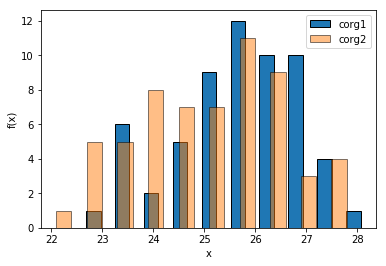

In [25]:
fig, ax = plt.subplots()
ax.bar(x1,n1,label='corg1',width=n1_half_width,edgecolor='k')
ax.bar(x2,n2,label='corg2',width=n2_half_width,edgecolor='k',alpha=0.5)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.legend()

In [42]:
t_stat, pval = sts.ttest_ind(corg1[0,:],corg2[0,:])

alpha = 0.5 

if pval < alpha: 
    h = 1
    print('We reject the null hypothesis')
else: 
    h = 0 
    print('We DO NOT reject the null hypothesis')

We reject the null hypothesis


# Demo 3: F-test 

In [46]:
# load data - wt percent organic matter in lake cores
data  = sio.loadmat('organicmatter_four.mat')
corg1 = data['corg1'].astype(np.float32)
corg2 = data['corg2'].astype(np.float32)

# calculate standard deviation of first data set
s1 = np.std(corg1)
# calculate standard deviation second data set
s2 = np.std(corg2)

In [55]:
# DOF for data set 1
df1 = corg1.shape[1] - 1
# DOF for data set 2
df2 = corg2.shape[1] - 1

# make sure sample size is large enough
if (df1 < 31) or (df2 < 31):
    print('Sample size too small')

In [56]:
# Calculate statistic with larger variance on top
if s1 >= s2: 
    Fobs = s1**2 / s2**2
elif s1 < s2: 
    Fobs = s2**2 / s1**2
else: 
    print('something is wrong with variances')

In [57]:
alpha = 0.05
Fcrit = sts.f.isf(alpha,df1,df2)

In [60]:
# Decide whether null hypothesis can be rejected
if Fobs > Fcrit:    # Observed F > Critical F
    h = 1
    print('Reject null hypothesis:')
    print('\t variances are different at prescribed significance level')
elif Fobs <= Fcrit: # Observed F < Critical F
    h = 0
    print('Do not reject null hypothesis:')
    print('\t variances are indistinguishable at prescribed significance level')
else: 
    print('Something is wrong with F comparison!')

Do not reject null hypothesis:
	 variances are indistinguishable at prescribed significance level


# Demo 4: Chi-squared test 

In [123]:
# load data - wt percent organic matter in lake cores
corg1 = np.loadtxt('organicmatter_one.txt')

bin_width  = 0.65
corg1_bins = np.arange(10-bin_width/2, 14.55+bin_width, bin_width)

Text(0, 0.5, 'Frequency')

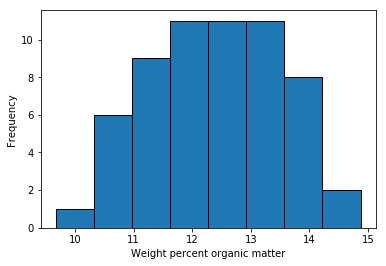

In [130]:
f_obs  = np.histogram(corg1,corg1_bins)

fig, ax = plt.subplots()
ax.hist(corg1,corg1_bins,edgecolor='k')
ax.set_xlabel('Weight percent organic matter')
ax.set_ylabel('Frequency')

In [139]:
# Generate theoretical distribution
# calculate mean
corg1_mean = np.mean(corg1)
# calculate standard deviation
corg1_std  = np.std(corg1)

f_trt = sts.norm.pdf(corg1_bins[:-1] + bin_width/2, corg1_mean, corg1_std)

In [140]:
# Scale distribution to data:
f_trt_total  = np.sum(f_trt)
f_obs_total  = np.sum(f_obs[0])

f_trt_scaled = f_trt*(f_obs_total/f_trt_total)

Text(0, 0.5, 'Frequency')

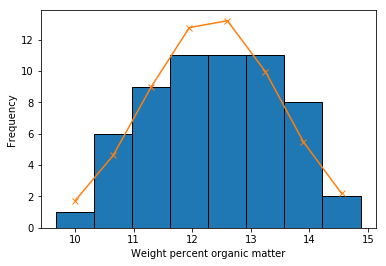

In [143]:
fig, ax = plt.subplots()
ax.hist(corg1,corg1_bins,edgecolor='k')
ax.plot(corg1_bins[:-1] + bin_width/2, f_trt_scaled, '-x')
ax.set_xlabel('Weight percent organic matter')
ax.set_ylabel('Frequency')

The comparison may look favourable, but note that these are the same data as those used in `Demo 1`. 
Would your visual judgment lead to the same result here as it did there? 
Let's get __QUANTITATIVE__, shall we? 


In [146]:
# Calculate chi-square
chi2 = np.sum( (f_obs[0] - f_trt_scaled)**2 /f_trt_scaled )

In [156]:
K = (corg1_bins[:-1] + bin_width/2).shape[0]  # number of classes
Z = 2 + 1                                     # number of parameters (mu, sigma) + variables
DOF = K - Z                                   # calculate degrees of freedom
alpha = 0.05                                  # set significance level
chi2_crit = sts.chi2.isf(alpha,DOF)           # Find critical chi^2 value for alpha, DOF

In [161]:
if chi2 > chi2_crit:               # chi2 > Critical chi2
    h = 1
    print('Reject null hypothesis: your data are not Gaussian!')
elif chi2 <= chi2_crit:            # chi2 < Critical chi2
    h=0
    print('Do not reject null hypothesis: your data are Gaussian!')
else:
    print('Something is wrong with F comparison!')     

Do not reject null hypothesis: your data are Gaussian!
